## Name: Syed Mustafa

## Task 3: Perform 'Exploratory Data Analytics- Retail' on dataset 'SampleSuperstore'.

#### #GRIPAUG21 @The Sparks Foundation

#### Data Science and Business Analytics

#### 1. Importing Libraries


In [63]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### 2. Extracting dataset

In [64]:
#Importing dataset SampleSuperstore
data=pd.read_csv("C:\\Users\\Syed Mustafa\\Desktop\\SampleSuperstore.csv")

In [65]:
#checking the Data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

so we can conclude that all the datatypes are correct and no changes required

#### 3. Showing first 5 and last 5 rows

In [66]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [68]:
data.shape

(9994, 13)

In [69]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


This function only shows the continoius variables. Here are the few observations we can make from this particular thing:

1. No missing values in the Dataset.
2.In Sales and Profit, the difference between max value and 75% is quite high which indicates outliers in the dataset.

In [70]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [71]:
data.iloc[0:3,0:2]

,Ship Mode,Segment
0,Second Class,Consumer
1,Second Class,Consumer
2,Second Class,Corporate


Following conclusion we can make for categorical variables:

1. There are only 4 types of shipping mode we will examine.
2. This dataset is given for 3 segments of people.

#### 4. Data cleaning - Remove null values, removing duplicate values

##### Checking null values

In [72]:
#To check null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No null values

In [73]:
#Checking data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

###### Dropping irrelevant columns

In [74]:
#Dropping irrelevant columns
data=data.drop(['Ship Mode','Segment','Country','Region'],axis=1)
data.head()

,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Remaining the column names

In [75]:
#Remaining the column names
data= data.rename(columns={"Postal Code": "Code","Sub-Category": "Sub-Cat"})
data.head()

,City,State,Code,Category,Sub-Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [76]:
#Total number of rows and columns
data.shape

(9994, 9)

In [77]:
#Rows containing duplicate data
duplicate_rows_data= data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows_data.shape)

Number of duplicate rows: (76, 9)


In [78]:
#Counting the number of rows before removing the data
data.count()

City        9994
State       9994
Code        9994
Category    9994
Sub-Cat     9994
Sales       9994
Quantity    9994
Discount    9994
Profit      9994
dtype: int64

#### Dropping duplicate

In [79]:
#Dropping duplicates
data=data.drop_duplicates()
data.head()


,City,State,Code,Category,Sub-Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [80]:
data.count()

City        9918
State       9918
Code        9918
Category    9918
Sub-Cat     9918
Sales       9918
Quantity    9918
Discount    9918
Profit      9918
dtype: int64

#### Univariate Analysis

In [81]:
#In which city we have the most sales
data['City'].value_counts()

New York City      903
Los Angeles        733
Philadelphia       528
San Francisco      500
Seattle            418
                  ... 
Rochester Hills      1
Cedar Rapids         1
Bartlett             1
Waterloo             1
Iowa City            1
Name: City, Length: 531, dtype: int64

In [82]:
data['City'].value_counts()/len(data['City'])*100

New York City      9.104658
Los Angeles        7.390603
Philadelphia       5.323654
San Francisco      5.041339
Seattle            4.214559
                     ...   
Rochester Hills    0.010083
Cedar Rapids       0.010083
Bartlett           0.010083
Waterloo           0.010083
Iowa City          0.010083
Name: City, Length: 531, dtype: float64

In [83]:
#Getting top 10 cities wih maximum sales
data['City'].value_counts()[0:10]

New York City    903
Los Angeles      733
Philadelphia     528
San Francisco    500
Seattle          418
Houston          371
Chicago          311
Columbus         220
San Diego        170
Springfield      162
Name: City, dtype: int64

In [84]:
data['City'].value_counts()[0:10].keys()

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego',
       'Springfield'],
      dtype='object')

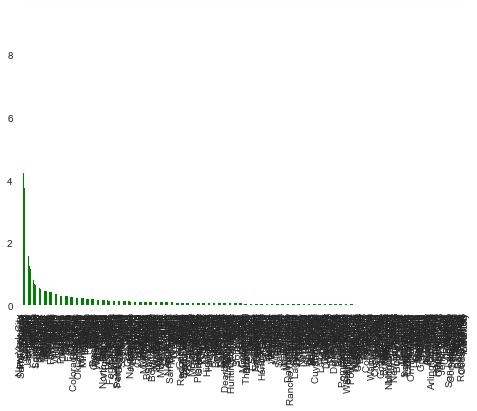

In [85]:
a=(data['City'].value_counts()/len(data['City'])*100).plot(kind='bar',color='g')

Following conclusions can be made from the graph:

1. 50% of people belongs to consumer class.
2. 20-30% of the people belong to corporate and the Home offices.

### Find sales for each Category and Sub-Category


In [86]:
data['Category'].value_counts()

Office Supplies    5962
Furniture          2113
Technology         1843
Name: Category, dtype: int64

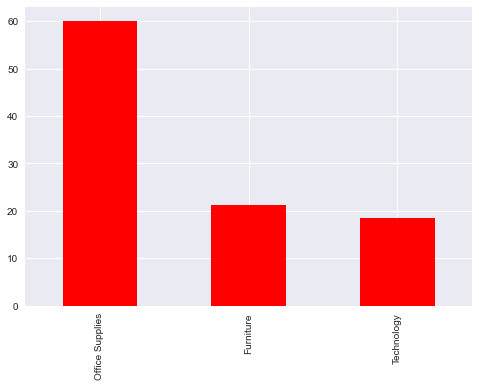

In [87]:
s=(data['Category'].value_counts())/len(data['Category'])*100
s.plot(kind='bar',color='r')

Following Conclusions can be made from the graph:

1. Most of the categories belongs to Office Supplies in Supermart.
2. 20-25% belongs to furniture and the technology.

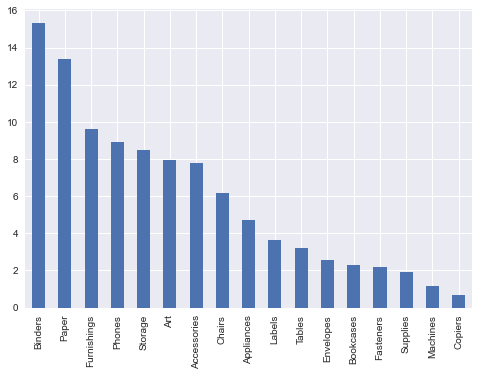

In [88]:
sc=((data['Sub-Cat'].value_counts())/len(data['Sub-Cat'])*100).plot(kind='bar')

From the graph,we can conclude :
1. 9-15% Sub-Cat falls under the Office Supplies.
2. 2-2.8% Sub-Cat belongs to Technology and furniture.


#### 4.Data Visualization

###### Bar plot of top 5 cities Vs it's Sales values

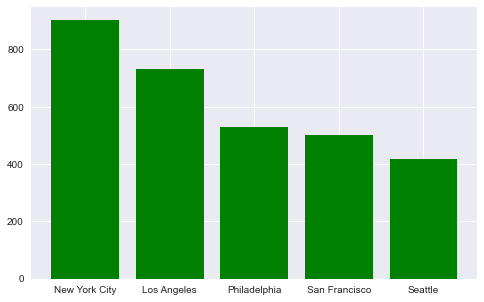

In [89]:
plt.figure(figsize=(8,5))
plt.bar(list(data['City'].value_counts()[0:5].keys()),list(data['City'].value_counts()[0:5]),color='g')
plt.show()

#### Extracting records of the states with only profit into the variables 'Only_profit.

In [90]:
Only_profit = data[data['Profit']>=0]

In [91]:
Only_profit.head()

,City,State,Code,Category,Sub-Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.940,3,0.0,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Los Angeles,California,90032,Furniture,Furnishings,48.860,7,0.0,14.1694


#### Extracting records of the states with only loss into the variables 'Only_loss.

In [92]:
Only_loss=data[data['Profit']<0]

In [93]:
Only_loss.head()

,City,State,Code,Category,Sub-Cat,Sales,Quantity,Discount,Profit
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Fort Worth,Texas,76106,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Fort Worth,Texas,76106,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Philadelphia,Pennsylvania,19140,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Philadelphia,Pennsylvania,19140,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


### HISTOGRAM

#### Distribution of Sales using Histogram

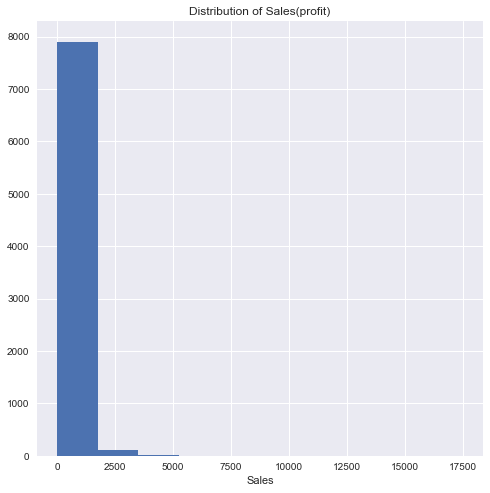

In [94]:
plt.figure(figsize=(8,8))
plt.hist(Only_profit['Sales'])
plt.title("Distribution of Sales(profit)")
plt.xlabel("Sales")
plt.show()

In [95]:
Only_profit['Sub-Cat'].value_counts()

Paper          1326
Binders         909
Art             790
Furnishings     788
Phones          750
Accessories     683
Storage         681
Appliances      399
Chairs          380
Labels          361
Envelopes       252
Fasteners       204
Supplies        155
Bookcases       119
Tables          115
Machines         71
Copiers          68
Name: Sub-Cat, dtype: int64

In [96]:
max(Only_profit['Profit'])

8399.976

In [97]:
Only_loss['Sub-Cat'].value_counts()

Binders        612
Chairs         234
Tables         203
Furnishings    165
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Cat, dtype: int64

#### BAR PLOT

###### Making a bar-plot for top sub categories with most profits

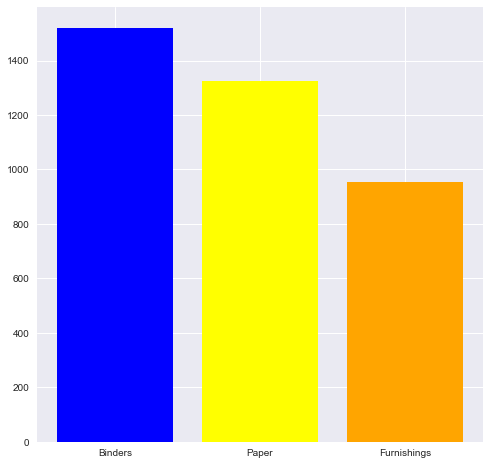

In [98]:
plt.figure(figsize=(8,8))
plt.bar(list(data['Sub-Cat'].value_counts()[0:3].keys()),list(data['Sub-Cat'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

<ipython-input-99-bc50bdd93947>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1440x1440 with 0 Axes>

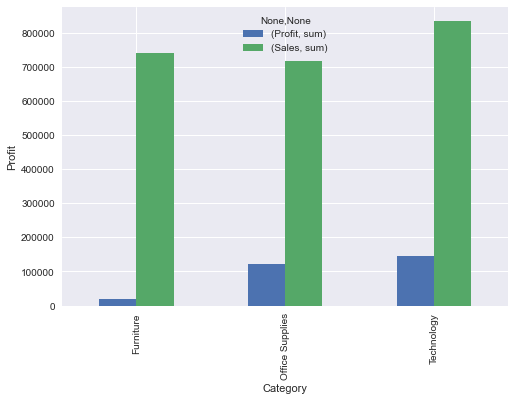

In [99]:
plt.figure(figsize=(20,20))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

#### PIE CHART

##### Pie chart showing the percentage of each subcategory

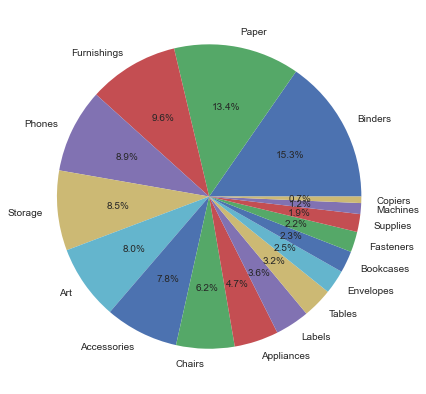

In [100]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Sub-Cat'].value_counts()),labels=list(data['Sub-Cat'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

#### BOX PLOT

##### Detecting Outliers with visualizations using a box plot

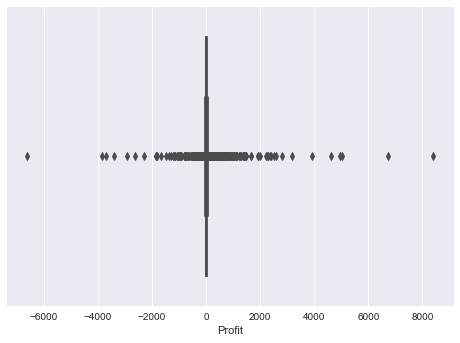

In [101]:
sns.boxplot(x=data['Profit'])

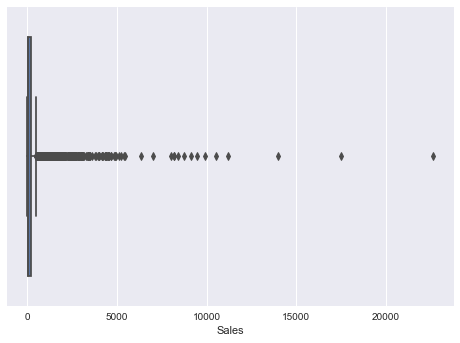

In [102]:
sns.boxplot(x=data['Sales'])

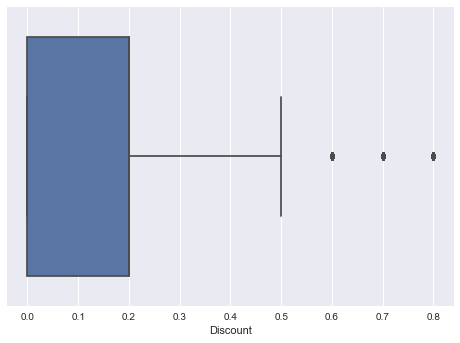

In [103]:
sns.boxplot(x=data['Discount'])

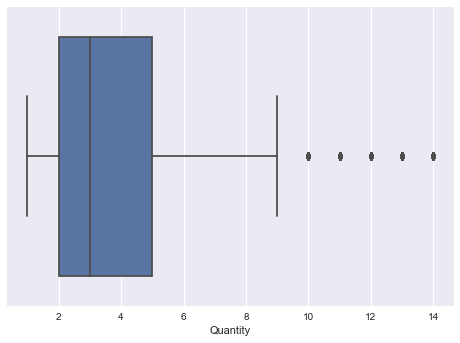

In [104]:
sns.boxplot(x=data['Quantity'])

#### REMOVING THE OUTLIERS

In [105]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Code        66781.000000
Sales         193.262500
Quantity        3.000000
Discount        0.200000
Profit         27.868575
dtype: float64


#### HEAT MAPS

##### Finding relations between the variables using HEAT MAPS

,Code,Sales,Quantity,Discount,Profit
Code,1.000000,-0.023453,0.013812,0.060094,-0.029905
Sales,-0.023453,1.000000,0.200421,-0.028907,0.479033
Quantity,0.013812,0.200421,1.000000,0.007871,0.066081
Discount,0.060094,-0.028907,0.007871,1.000000,-0.220014
Profit,-0.029905,0.479033,0.066081,-0.220014,1.000000


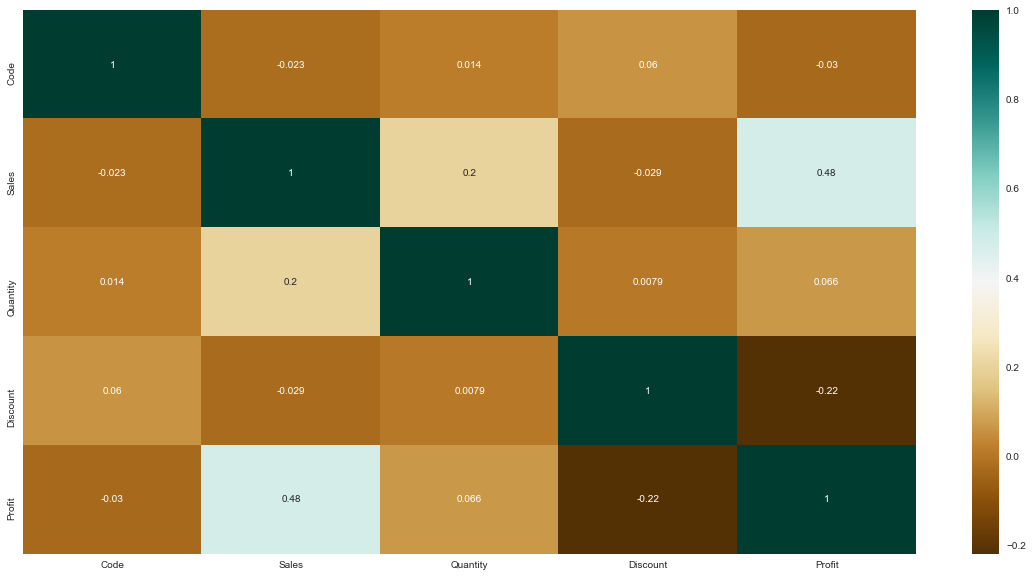

In [106]:
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c, cmap="BrBG",annot= True)
c

#### Sales VS Profit of top 10 states

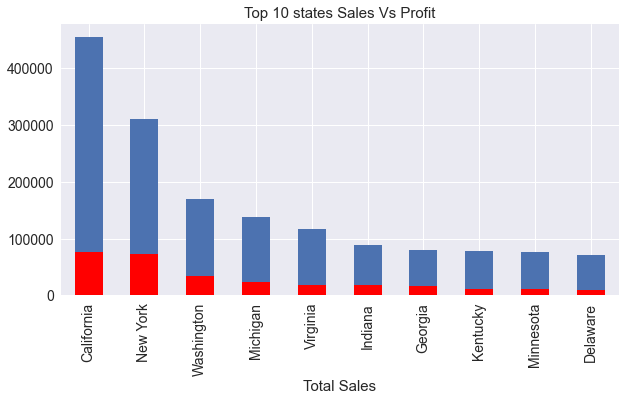

In [107]:
top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = data.groupby("State").Profit.sum().nlargest(n=10)
plt.style.use('seaborn')
top_states_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_states_p.plot(kind='bar',figsize=(10,5),fontsize=14,color='red')
plt.xlabel('States',fontsize=15)
plt.xlabel('Total Sales',fontsize=15)
plt.title("Top 10 states Sales Vs Profit",fontsize=15)
plt.show()


#### SCATTERPLOT

##### To find the correlation between two variables Sales and Profit.

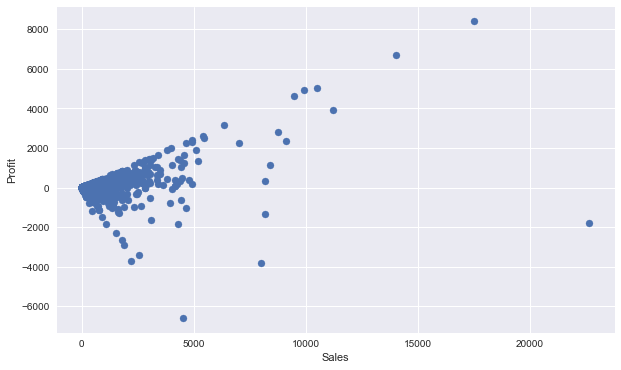

In [108]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

In this Scatterplot as we can see that for some certain values of Sales ,simultaneously we are getting profit as well as loss so particularly profit is more.

#### PAIRPLOT

##### Pairplot of all the attributes of the dataset.

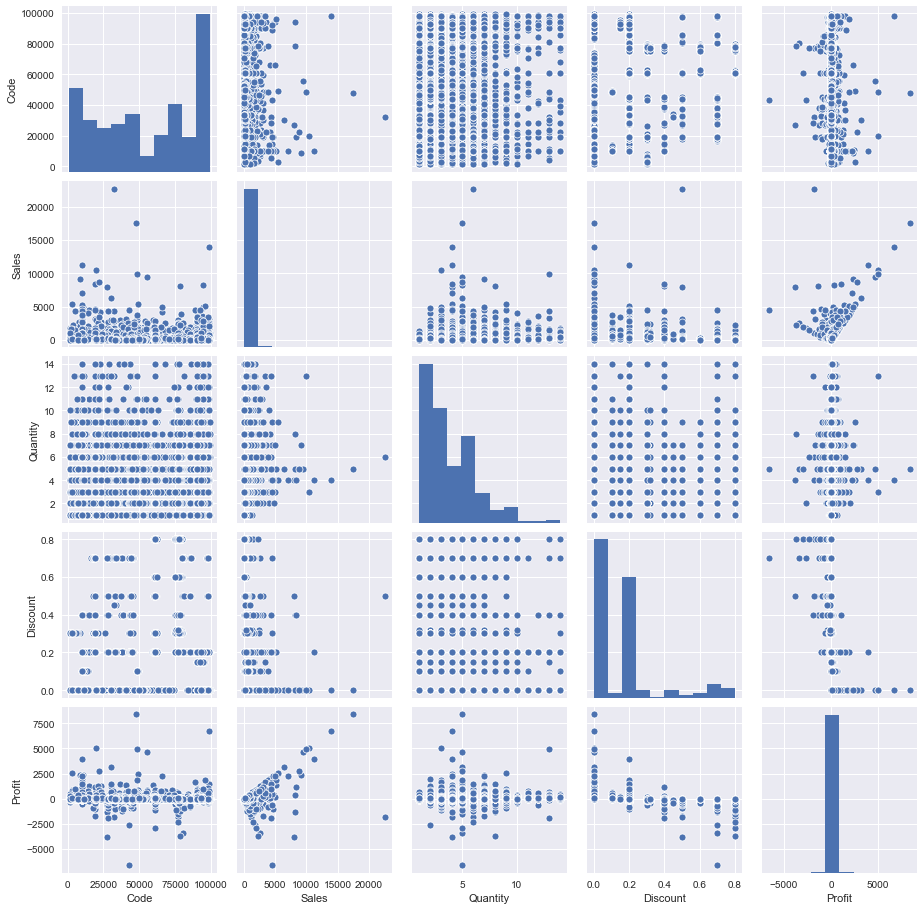

In [109]:
sns.pairplot(data)

#### Conclusion

Exploratory Data Analysis(EDA) and Data Visualization are powrful tools and that can Highlight problems to be addressed, lead to insights, and suggest patterns in the date. They do not , however, allow strong comparison to be drawn or provide estimates of how confident the analyst can be in his or her conclusions. Here, we will reviews what you can learn from EDA and how thos impacts options for further analysis.

Increase sales more in New York city, Los Angeles, Philadelphia, San Fransisco, Seattle as profit is more there. Citities like Danbury, Campaign, Antioch, Missouri City, Jefferson City are having a very low number of sales. Sub-category of products like paper, binders, art, Furnishing, Phones has the Most number of sales and are profitable sub-categories of products.
